<a href="https://colab.research.google.com/github/debi201326/AAI_Practical/blob/main/SDL_Practical_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing a Long Short-Term Memory (LSTM) Network for Predicting House Prices using Size, Location, Age

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
file_path = '/content/house_price.csv'
print("First few rows:")
print(data.head())

First few rows:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [ ]:
label_enc = LabelEncoder()
data['Location'] = label_enc.fit_transform(data['Location'])

In [ ]:
data = data.dropna()

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
data['YearBuilt'] = pd.to_numeric(data['YearBuilt'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data.dropna()


In [ ]:
X = data[['Area', 'Location', 'YearBuilt']].values
y = data['Price'].values.reshape(-1, 1)

In [ ]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

In [ ]:
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2155 - mae: 0.3863 - val_loss: 0.0944 - val_mae: 0.2677
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0915 - mae: 0.2592 - val_loss: 0.0899 - val_mae: 0.2617
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0882 - mae: 0.2538 - val_loss: 0.0881 - val_mae: 0.2577
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0909 - mae: 0.2609 - val_loss: 0.0877 - val_mae: 0.2583
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0830 - mae: 0.2475 - val_loss: 0.0870 - val_mae: 0.2560
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0832 - mae: 0.2457 - val_loss: 0.0873 - val_mae: 0.2576
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0825 - mae: 0.2481 - val_loss: 0.0867 - val_mae: 0.2561
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0839 - mae: 0.2485 - val_loss: 0.0870 - val_mae: 0.2548
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms

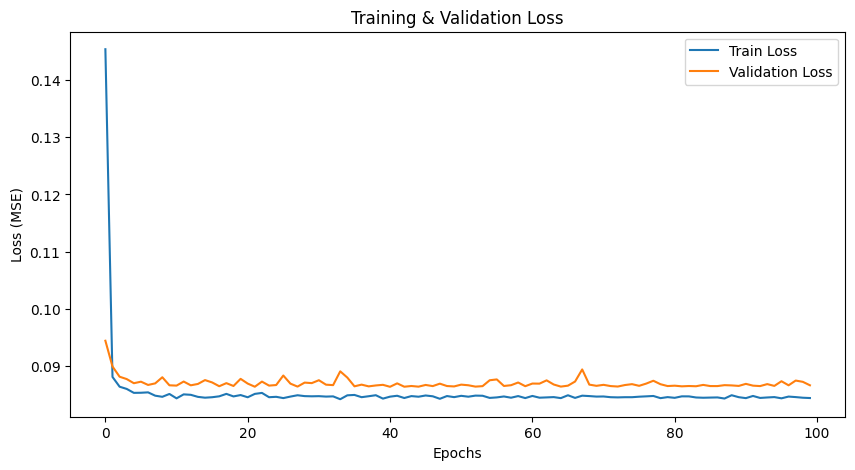

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae * 100000:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0835 - mae: 0.2506  
Test MAE: 25586.16


In [ ]:
y_pred = model.predict(X_test)
y_pred_rescaled = y_scaler.inverse_transform(y_pred)
y_test_rescaled = y_scaler.inverse_transform(y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


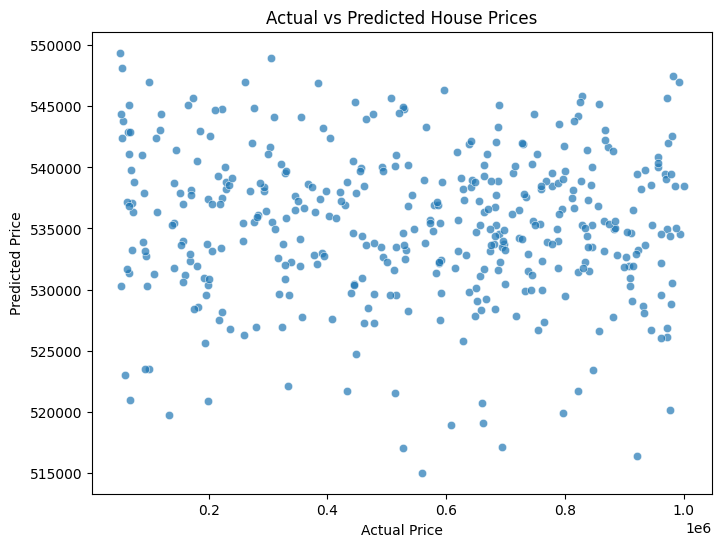

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_rescaled.flatten(), y=y_pred_rescaled.flatten(), alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [ ]:
print("\n--- House Price Prediction ---")
size = float(input("Enter house size (sq ft): "))
location = input("Enter location (same as in dataset): ")
age = float(input("Enter house age (years): "))

loc_encoded = label_enc.transform([location])[0]


--- House Price Prediction ---
Enter house size (sq ft): 1256
Enter location (same as in dataset): Urban
Enter house age (years): 1991


In [ ]:
user_input = np.array([[size, loc_encoded, age]])
user_input_scaled = x_scaler.transform(user_input)
user_input_scaled = user_input_scaled.reshape((1, 1, 3))

pred_price = model.predict(user_input_scaled)
predicted_price = y_scaler.inverse_transform(pred_price)

print(f"\nPredicted House Price: ₹{predicted_price[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Predicted House Price: ₹544,140.56
